In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from typing import List

warnings.filterwarnings("ignore")
%matplotlib inline

TRAIN_FILE = '../data/processed/train_processed.parquet'
TEST_FILE = '../data/processed/test_processed.parquet'
SAMPLE_SUBMISSION = '../data/raw/sample_submission.csv'


In [5]:
def set_display() -> None:
    """Function sets display options for charts and pd.DataFrames."""
    plt.style.use('fivethirtyeight')
    plt.rcParams['figure.figsize'] = 12, 8
    plt.rcParams.update({'font.size': 14})
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)
    pd.options.display.float_format = '{:.4f}'.format


def dataset_info(df: pd.DataFrame):
    print(df.info())
    
    print("\nПропуски в полях:")
    print(df.isnull().sum())


    

In [6]:
train_df = pd.read_parquet(TRAIN_FILE, engine='auto')
test_df = pd.read_parquet(TEST_FILE, engine='auto')
sample_submission = pd.read_csv(SAMPLE_SUBMISSION)

train (79912, 52)


,id,start_date,end_date,duration,linear_trend,phase_duration,max_trend_length,time_series_entropy,calculate_iqr,variance_larger_than_standard_deviation,...,absolute_maximum,minimum,benford_correlation,autocorrelation_lag_1,fft_coefficient_0,fft_coefficient_1,number_crossing_0,energy_ratio_by_chunks,permutation_entropy,target
41157,187,17198,19205,2007,-0.031891,9,5,2.148438,1.580078,1.0,...,2.730469,-2.121094,0.905762,0.432129,4.582031,24.265625,21,0.023651,0.983887,1.0
71067,79812,17167,18444,1277,-0.017197,6,3,2.054688,1.474609,1.0,...,2.789062,-2.789062,0.928711,0.021408,0.930176,5.308594,22,0.014069,0.983398,0.0
2551,74103,16832,18779,1947,-0.044098,21,6,2.150391,1.870117,1.0,...,2.720703,-2.179688,0.895020,0.777832,2.660156,38.875000,9,0.089600,0.965820,0.0


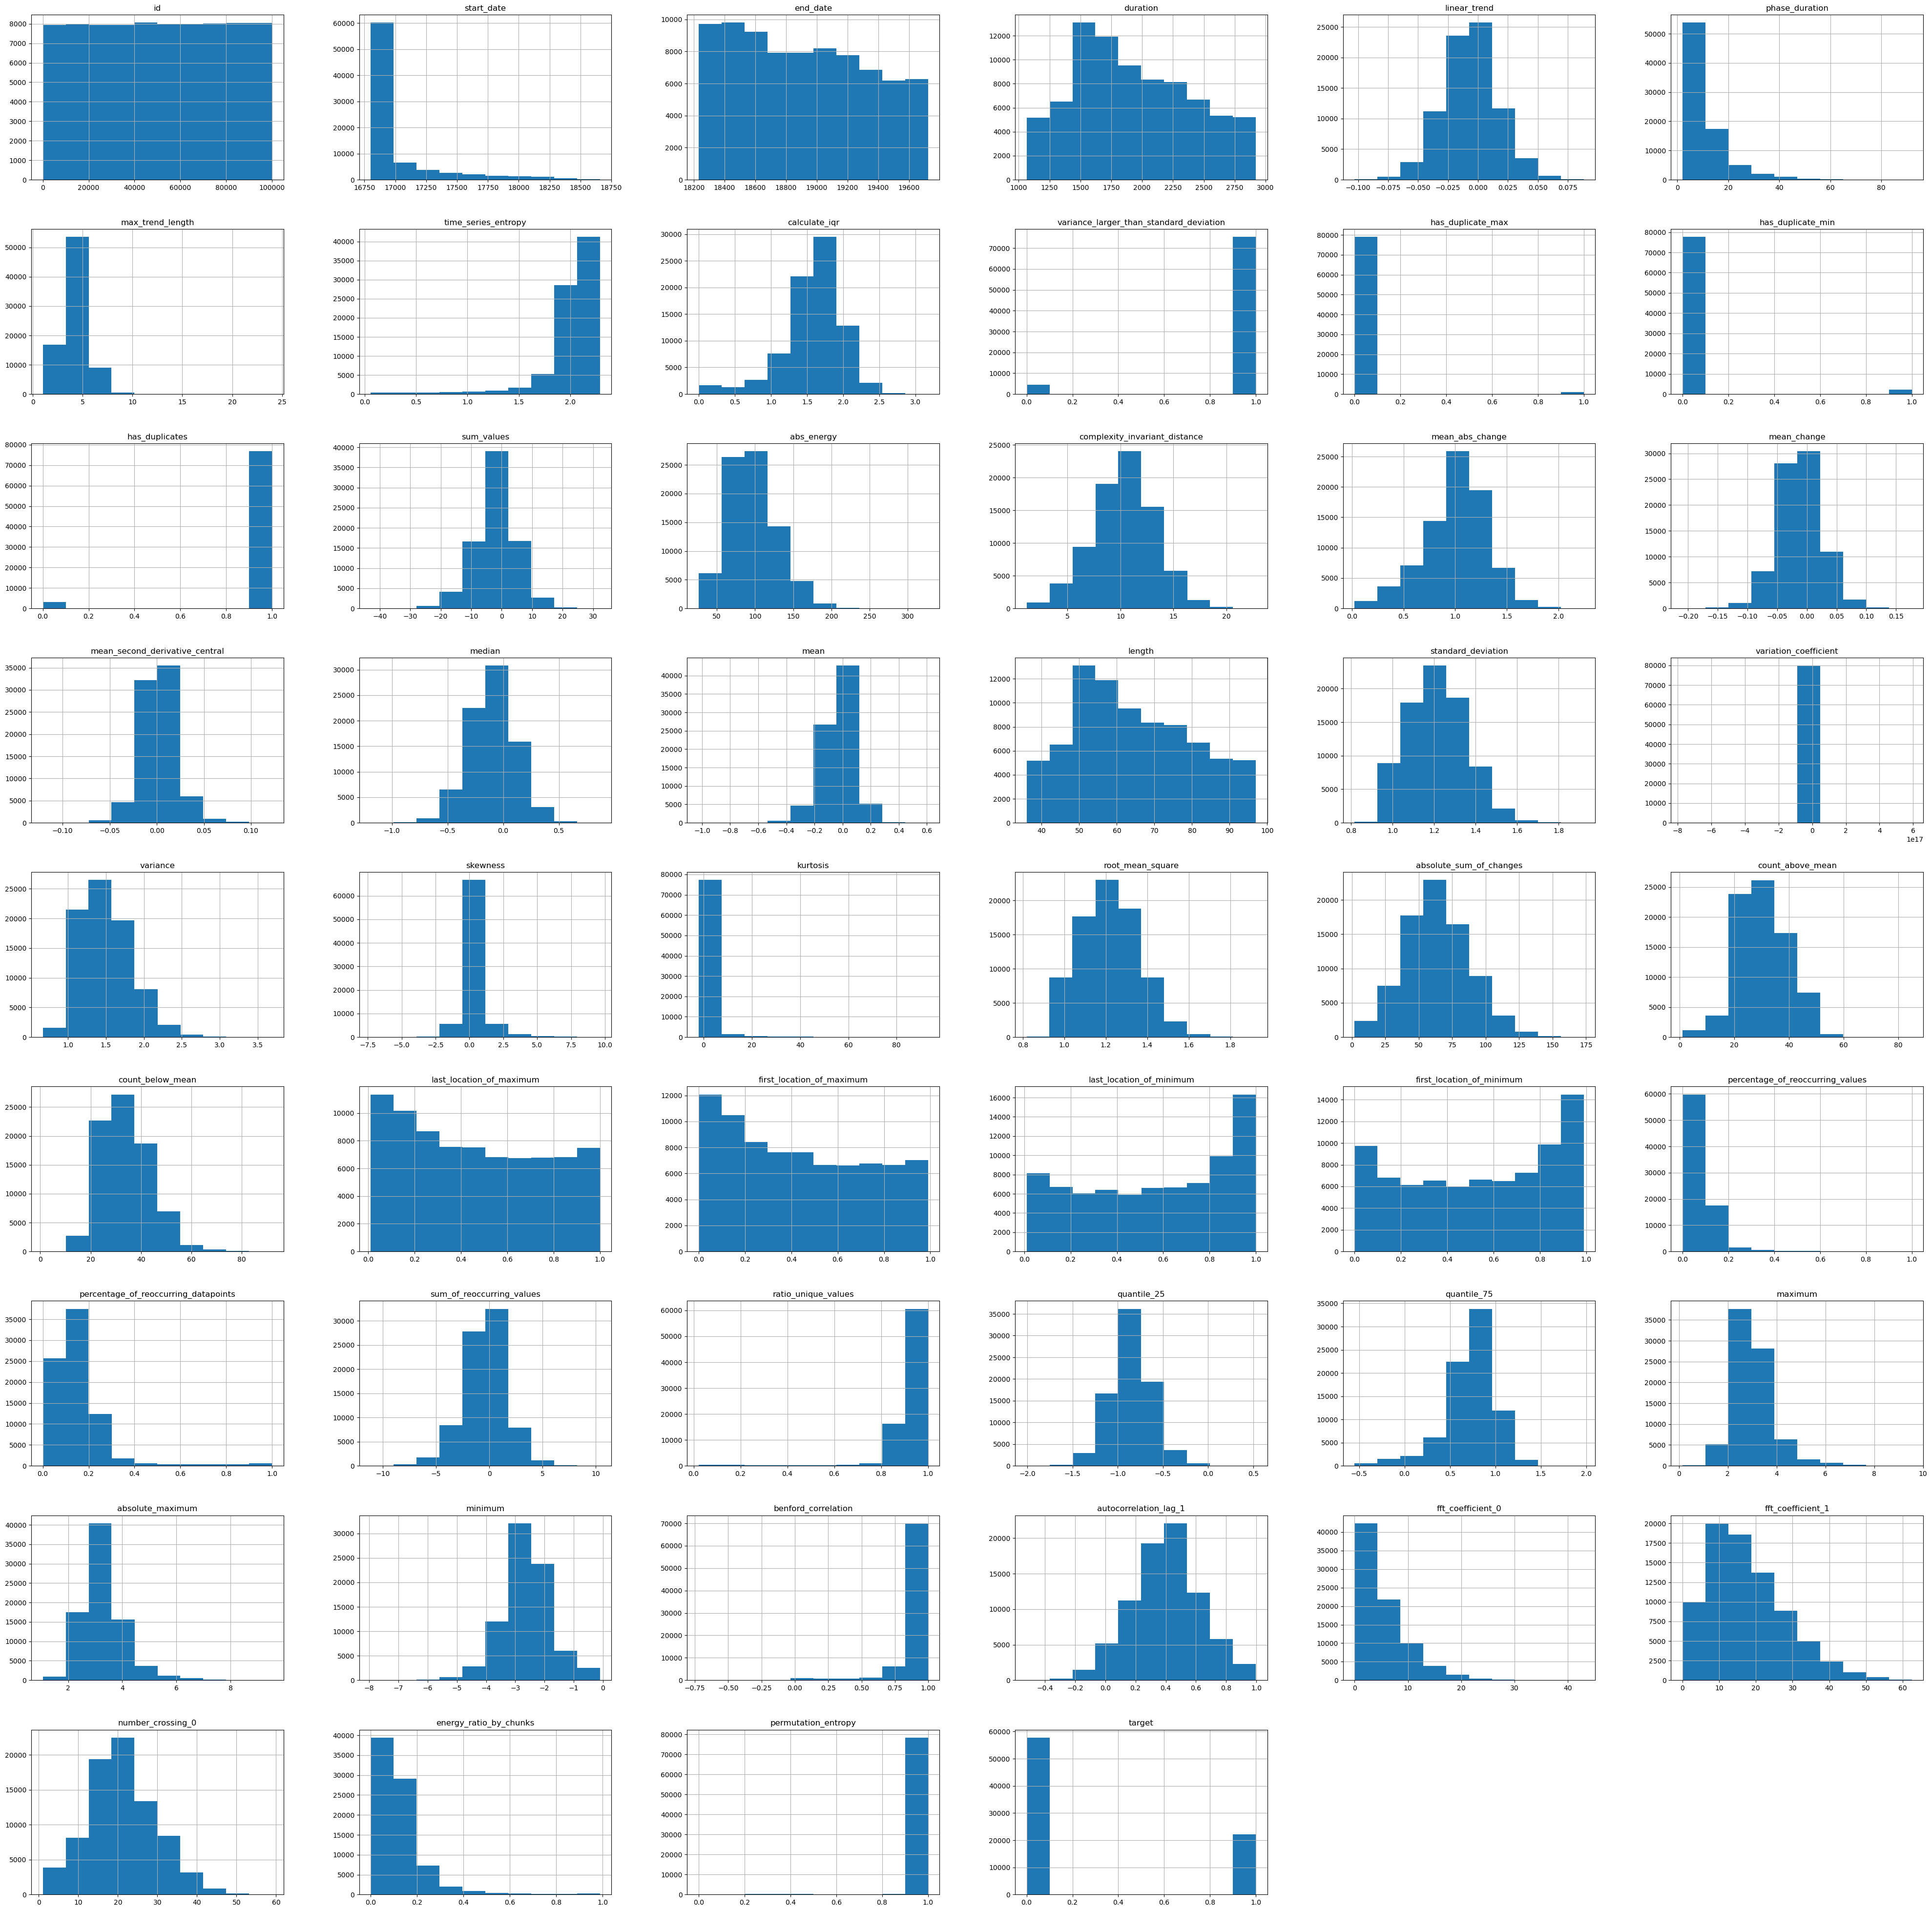

In [7]:
print("train", train_df.shape)
train_df.hist(figsize=(50, 50), layout=(-1, 6))
train_df.sample(3)

In [8]:
dataset_info(train_df)

<class 'pandas.core.frame.DataFrame'>
Index: 79912 entries, 0 to 79999
Data columns (total 52 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   id                                       79912 non-null  int32  
 1   start_date                               79912 non-null  int16  
 2   end_date                                 79912 non-null  int16  
 3   duration                                 79912 non-null  int16  
 4   linear_trend                             79912 non-null  float16
 5   phase_duration                           79912 non-null  int8   
 6   max_trend_length                         79912 non-null  int8   
 7   time_series_entropy                      79912 non-null  float16
 8   calculate_iqr                            79912 non-null  float16
 9   variance_larger_than_standard_deviation  79912 non-null  float16
 10  has_duplicate_max                        79912 non-

In [9]:
dataset_info(test_df)

<class 'pandas.core.frame.DataFrame'>
Index: 19979 entries, 0 to 19999
Data columns (total 51 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   id                                       19979 non-null  int32  
 1   start_date                               19979 non-null  int16  
 2   end_date                                 19979 non-null  int16  
 3   duration                                 19979 non-null  int16  
 4   linear_trend                             19979 non-null  float16
 5   phase_duration                           19979 non-null  int8   
 6   max_trend_length                         19979 non-null  int8   
 7   time_series_entropy                      19979 non-null  float16
 8   calculate_iqr                            19979 non-null  float16
 9   variance_larger_than_standard_deviation  19979 non-null  float16
 10  has_duplicate_max                        19979 non-

In [11]:
sample_submission.shape

(20001, 2)

Label 1: 22,127 (27.7%)
Label 0: 57,785 (72.3%)
Total: 79,912


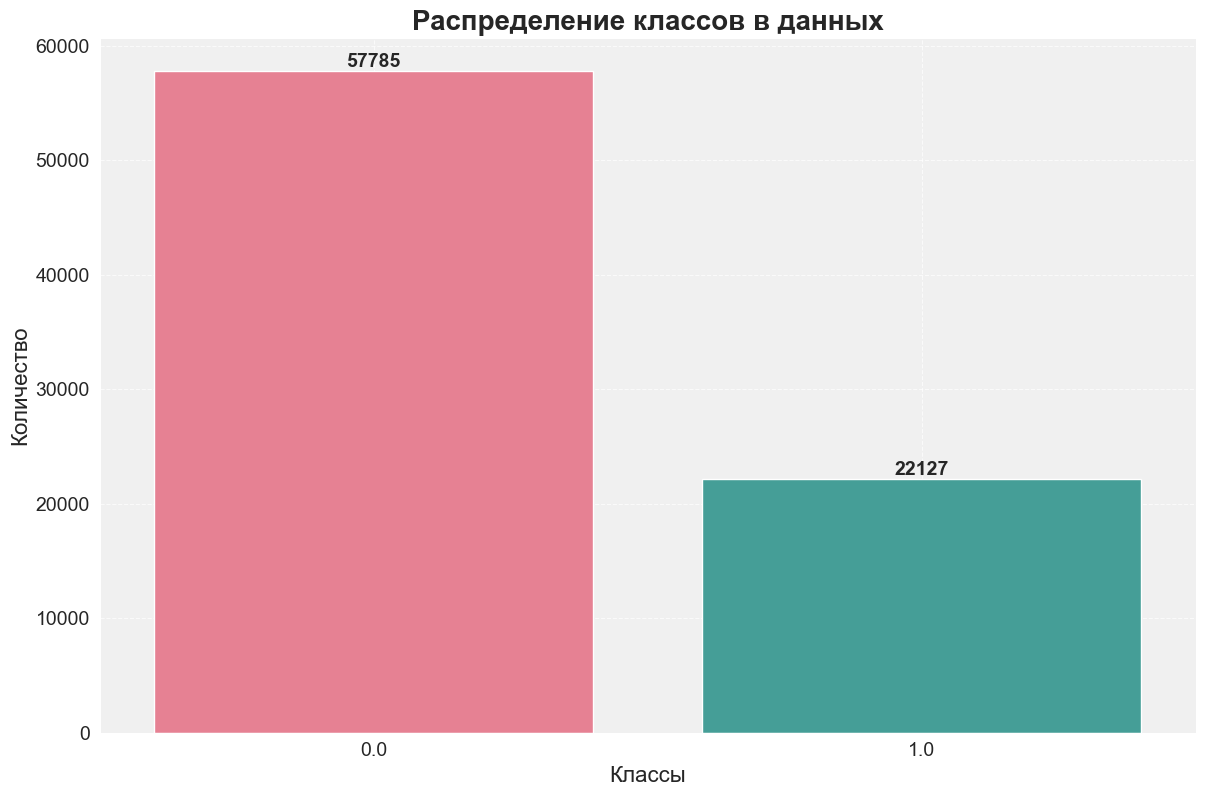

In [50]:
label_1_count = len(train_df[train_df['label'] == 1])
label_0_count = len(train_df[train_df['label'] == 0])
total_count = len(train_df)

print(f"Label 1: {label_1_count:,} ({label_1_count/total_count:.1%})")
print(f"Label 0: {label_0_count:,} ({label_0_count/total_count:.1%})")
print(f"Total: {total_count:,}")

sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))

colors = sns.color_palette("husl", 2)

ax = sns.barplot(x=train_df['label'].value_counts().index, 
                 y=train_df['label'].value_counts().values, 
                 palette=colors)

plt.title('Распределение классов в данных', fontsize=20, fontweight='bold')
plt.xlabel('Классы', fontsize=16)
plt.ylabel('Количество', fontsize=16)

for i, v in enumerate(train_df['label'].value_counts().values):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=14, fontweight='bold')

plt.tight_layout()

ax.grid(True, linestyle='--', alpha=0.7)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax.set_facecolor('#f0f0f0')

plt.show()